In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv(r"C:\Users\AnayJoshi28\Desktop\Projects\AICIT\btcNewsToPrice(in).csv")
data.head(5)

,date,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,...,top_13,top_14,top_15,top_16,top_17,top_18,price,open,high,low
0,7/1/2015,Australia Plays Centralized Role in Banning Mo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,257.6,264.1,265.0,254.4
1,7/2/2015,Digital Technology to Exponentially Disrupt Bu...,Bitcoin Is A Better Way of Transferring Value ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,254.9,257.6,261.3,253.1
2,7/3/2015,How Will Credit Work in a Bitcoin Economy?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,255.4,254.9,256.7,252.4
3,7/4/2015,Improper Network Block Validation Leads to Adv...,MasterCard Tests Facial Recognition Technology...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,260.5,255.4,261.1,253.4
4,7/5/2015,"Bitcoin Documentaries Are Oudated, Time to Tak...","Global Arena Holding, Inc to Acquire Blockchai...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,270.1,260.5,274.1,257.6


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2169 entries, 0 to 2168
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2169 non-null   object 
 1   top_0   2169 non-null   object 
 2   top_1   2145 non-null   object 
 3   top_2   2043 non-null   object 
 4   top_3   1777 non-null   object 
 5   top_4   1478 non-null   object 
 6   top_5   1192 non-null   object 
 7   top_6   972 non-null    object 
 8   top_7   768 non-null    object 
 9   top_8   622 non-null    object 
 10  top_9   481 non-null    object 
 11  top_10  356 non-null    object 
 12  top_11  220 non-null    object 
 13  top_12  142 non-null    object 
 14  top_13  92 non-null     object 
 15  top_14  57 non-null     object 
 16  top_15  34 non-null     object 
 17  top_16  18 non-null     object 
 18  top_17  5 non-null      object 
 19  top_18  1 non-null      object 
 20  price   2169 non-null   float64
 21  open    2169 non-null   float64
 22  

In [14]:
data['date'] = pd.to_datetime(data['date'])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2169 entries, 0 to 2168
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2169 non-null   datetime64[ns]
 1   top_0   2169 non-null   object        
 2   top_1   2145 non-null   object        
 3   top_2   2043 non-null   object        
 4   top_3   1777 non-null   object        
 5   top_4   1478 non-null   object        
 6   top_5   1192 non-null   object        
 7   top_6   972 non-null    object        
 8   top_7   768 non-null    object        
 9   top_8   622 non-null    object        
 10  top_9   481 non-null    object        
 11  top_10  356 non-null    object        
 12  top_11  220 non-null    object        
 13  top_12  142 non-null    object        
 14  top_13  92 non-null     object        
 15  top_14  57 non-null     object        
 16  top_15  34 non-null     object        
 17  top_16  18 non-null     object        
 18  top_17  

In [19]:
data.fillna('', inplace=True)

data['combined_news'] = data.apply(lambda row: ' '.join([row[f'top_{i}'] for i in range(19) if row[f'top_{i}'] != '']), axis=1)

processed_data = data[['date', 'combined_news', 'price', 'open', 'high', 'low']]
processed_data.head()

,date,combined_news,price,open,high,low
0,2015-07-01,Australia Plays Centralized Role in Banning Mo...,257.6,264.1,265.0,254.4
1,2015-07-02,Digital Technology to Exponentially Disrupt Bu...,254.9,257.6,261.3,253.1
2,2015-07-03,How Will Credit Work in a Bitcoin Economy?,255.4,254.9,256.7,252.4
3,2015-07-04,Improper Network Block Validation Leads to Adv...,260.5,255.4,261.1,253.4
4,2015-07-05,"Bitcoin Documentaries Are Oudated, Time to Tak...",270.1,260.5,274.1,257.6


In [20]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

processed_data['sentiment'] = processed_data['combined_news'].apply(get_sentiment)

processed_data[['date', 'combined_news', 'sentiment', 'price', 'open', 'high', 'low']].head()


C:\Users\AnayJoshi28\AppData\Local\Temp\ipykernel_13700\3738149074.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_data['sentiment'] = processed_data['combined_news'].apply(get_sentiment)


,date,combined_news,sentiment,price,open,high,low
0,2015-07-01,Australia Plays Centralized Role in Banning Mo...,0.00,257.6,264.1,265.0,254.4
1,2015-07-02,Digital Technology to Exponentially Disrupt Bu...,0.25,254.9,257.6,261.3,253.1
2,2015-07-03,How Will Credit Work in a Bitcoin Economy?,0.00,255.4,254.9,256.7,252.4
3,2015-07-04,Improper Network Block Validation Leads to Adv...,0.00,260.5,255.4,261.1,253.4
4,2015-07-05,"Bitcoin Documentaries Are Oudated, Time to Tak...",0.00,270.1,260.5,274.1,257.6


In [21]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2169 entries, 0 to 2168
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           2169 non-null   datetime64[ns]
 1   combined_news  2169 non-null   object        
 2   price          2169 non-null   float64       
 3   open           2169 non-null   float64       
 4   high           2169 non-null   float64       
 5   low            2169 non-null   float64       
 6   sentiment      2169 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 118.7+ KB


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as ms

In [26]:
X = processed_data[['sentiment', 'open', 'high', 'low']]
y = processed_data['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8)

model = LinearRegression()
model.fit(X_train,y_train)

y_predict = model.predict(X_test)

In [30]:
print("Model Score = ", model.score(X_test, y_test))
print("Mean Square Error = ",ms.mean_squared_error(y_test,y_predict))
print("Intercept = ", model.intercept_)

Model Score =  0.9994847521724969
Mean Square Error =  86190.63724523882
Intercept =  4.086597794766931


In [32]:
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
predictions.head()

,Actual,Predicted
1371,5046.2,5119.492339
746,2866.0,2854.664141
252,410.4,416.914369
741,1975.1,2082.457713
2069,48792.5,47878.972523


In [34]:
predictions = predictions.sort_index(axis=0)
predictions.head(10)

,Actual,Predicted
1,254.9,267.504125
7,268.6,272.208153
10,292.0,298.795335
12,290.4,293.845281
21,276.5,278.391783
30,281.6,285.531216
31,284.3,287.799634
43,257.1,260.846015
50,226.8,232.051671
58,229.5,245.067637


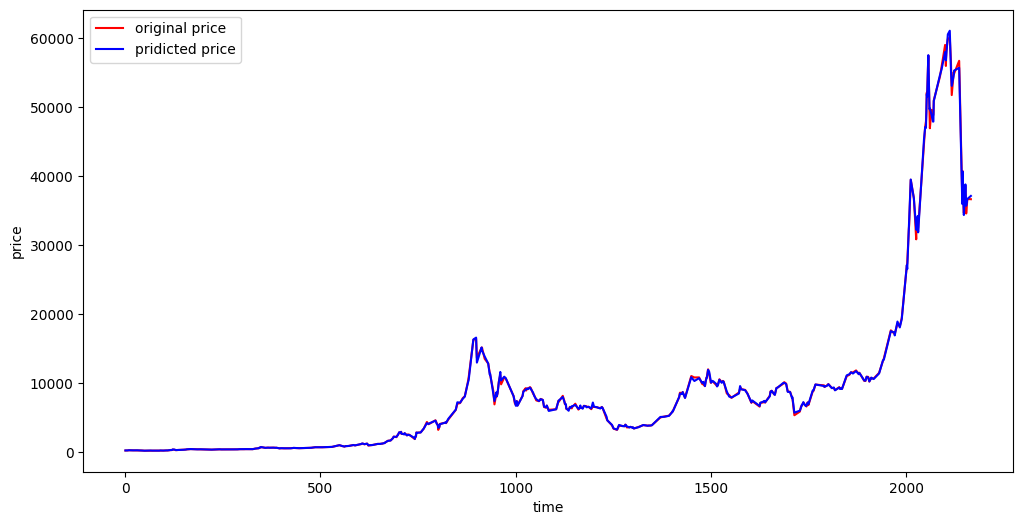

In [38]:
plt.figure(figsize=(12,6))
plt.plot(predictions['Actual'],'r',label= 'original price')
plt.plot(predictions['Predicted'],'b',label= 'pridicted price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

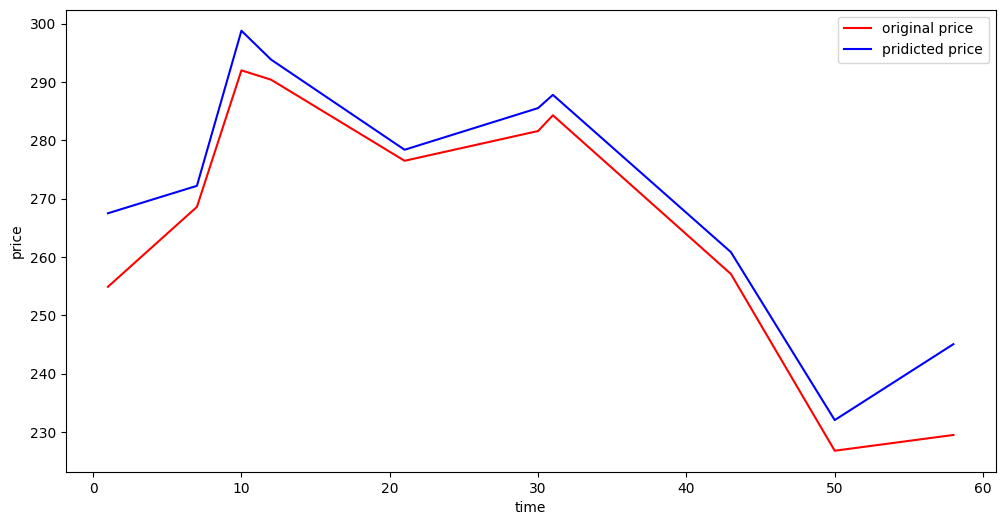

In [39]:
plt.figure(figsize=(12,6))
plt.plot(predictions['Actual'].head(10),'r',label= 'original price')
plt.plot(predictions['Predicted'].head(10),'b',label= 'pridicted price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

In [42]:
predictions.head(50)

,Actual,Predicted
1,254.9,267.504125
7,268.6,272.208153
10,292.0,298.795335
12,290.4,293.845281
21,276.5,278.391783
30,281.6,285.531216
31,284.3,287.799634
43,257.1,260.846015
50,226.8,232.051671
58,229.5,245.067637


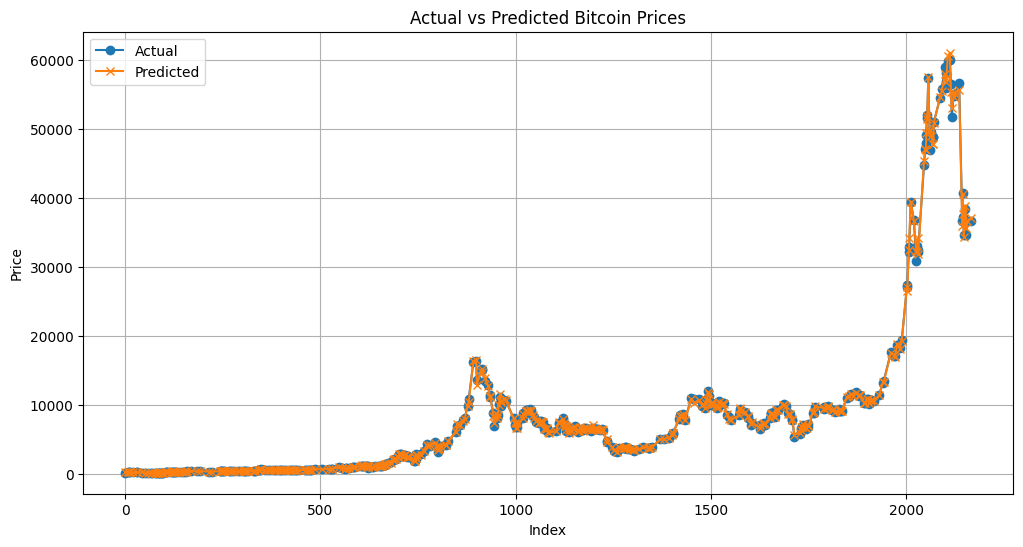